In [152]:
#IMPORTING ALL THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [153]:
#IMPORTING THE FILE

wine_df = pd.read_csv('C:/Users/croatia/Desktop/python/Datasets/WineQT.csv')

In [154]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [155]:
#CHECKING THE DATA

wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [156]:
#CHECKING FOR NULL VALUES

wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

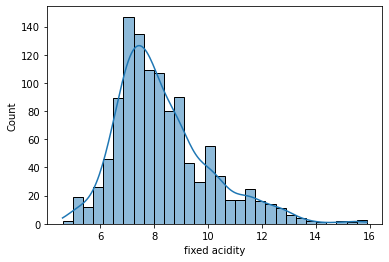

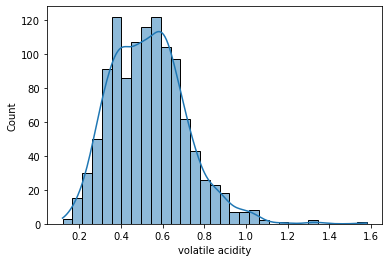

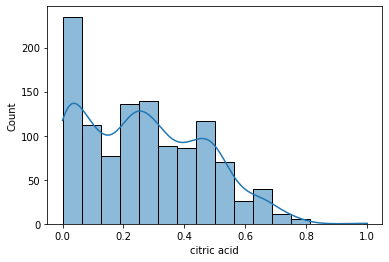

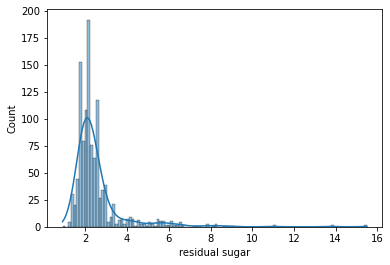

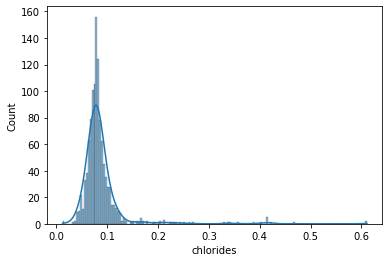

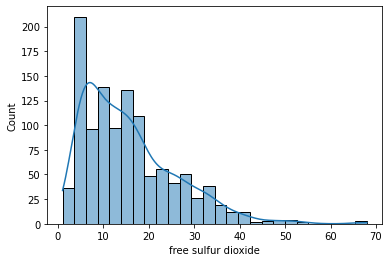

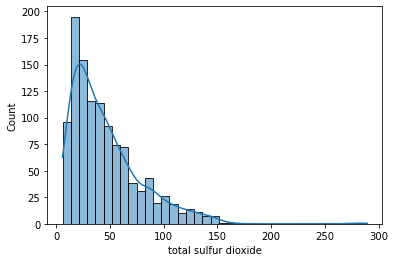

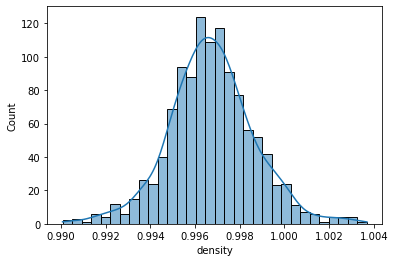

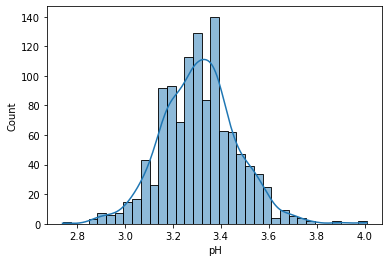

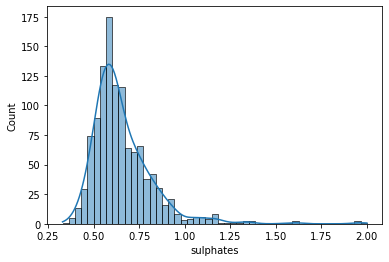

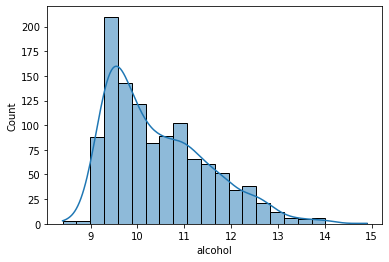

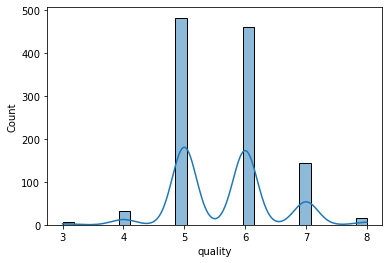

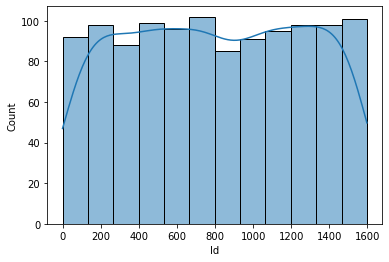

In [157]:
#LOOKING AT THE DISTRIBUTIONS

for i in wine_df.columns:
    plt.figure(i)
    sns.histplot(data=wine_df,x=i,kde=True)

<AxesSubplot:>

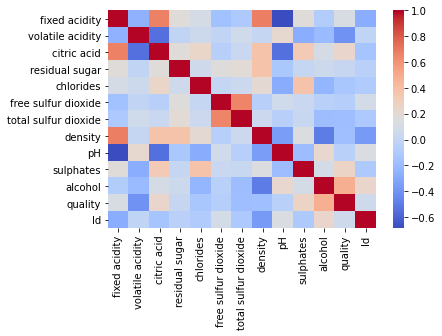

In [158]:
#LOOKING AT THE CORRELATION

sns.heatmap(wine_df.corr(),cmap='coolwarm')

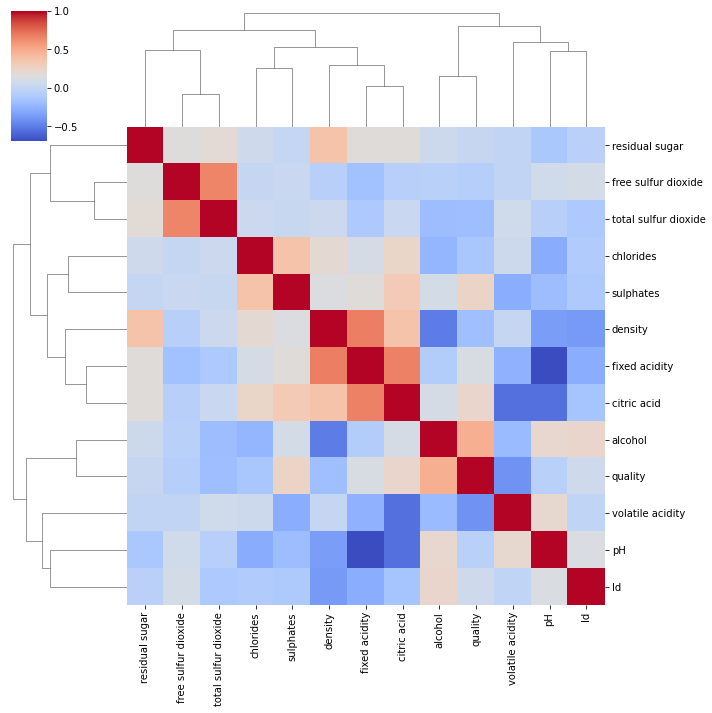

In [159]:
sns.clustermap(wine_df.corr(),cmap='coolwarm')

<AxesSubplot:xlabel='residual sugar'>

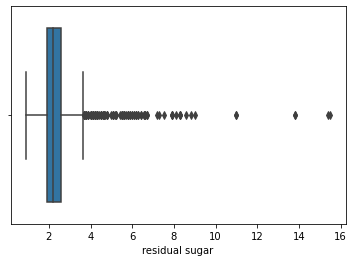

In [160]:
#LOOKING FOR OUTLIERS
#AT FIRST I THOUGHT IT WAS A GOOD IDEA TO REMOVE OUTLIERS
#FOR THIS DATASET IT TURNED OUT TO BE A BAD IDEA BECAUSE I WAS NOT ABLE TO DO OVERSAMPLING WITH SMOTE

sns.boxplot(wine_df['residual sugar'])

In [161]:
#wine_df.drop(wine_df[wine_df['residual sugar']>10].index,inplace=True)

<AxesSubplot:xlabel='chlorides'>

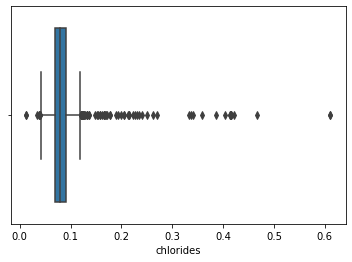

In [162]:
sns.boxplot(wine_df['chlorides'])

In [163]:
#wine_df.drop(wine_df[wine_df['chlorides']>0.3].index,inplace=True)

In [164]:
#wine_df.drop(wine_df.idxmin(),inplace=True)

<AxesSubplot:xlabel='total sulfur dioxide'>

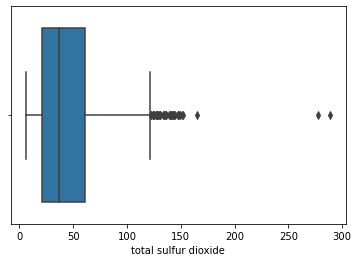

In [165]:
sns.boxplot(wine_df['total sulfur dioxide'])

In [166]:
#wine_df.drop(wine_df[wine_df['total sulfur dioxide']>200].index,inplace=True)

<AxesSubplot:xlabel='sulphates'>

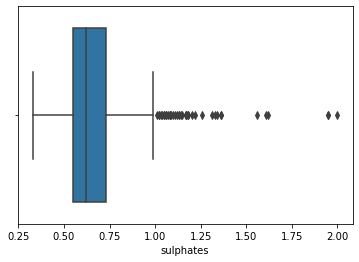

In [167]:
sns.boxplot(wine_df['sulphates'])

In [168]:
#wine_df.drop(wine_df[wine_df['sulphates']>1.3].index,inplace=True)

In [169]:
wine_df.drop('Id',axis=1,inplace=True)

In [170]:
#FIRST TRY AT MAKING MODELS WIHTOUT BALANCING THE DATASET

#RANDOM FOREST

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [171]:
X = wine_df.drop('quality',axis=1)
y = wine_df['quality']

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [173]:
rf = RandomForestClassifier(n_estimators=1000)

In [174]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [175]:
rf_pred = rf.predict(X_test)

In [176]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [177]:
print(classification_report(y_test,rf_pred))
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.67      0.77      0.72       143
           6       0.63      0.63      0.63       146
           7       0.68      0.56      0.61        41
           8       1.00      0.25      0.40         4

    accuracy                           0.66       343
   macro avg       0.60      0.44      0.47       343
weighted avg       0.64      0.66      0.65       343

[[  0   6   3   0   0]
 [  0 110  30   3   0]
 [  0  46  92   8   0]
 [  0   1  17  23   0]
 [  0   0   3   0   1]]


In [178]:
#DECISION TREE

from sklearn.tree import DecisionTreeClassifier

In [179]:
tree = DecisionTreeClassifier()

In [180]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [181]:
tree_pred = tree.predict(X_test)

In [182]:
print(classification_report(y_test,tree_pred))
print(confusion_matrix(y_test,tree_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.65      0.67      0.66       143
           6       0.60      0.51      0.55       146
           7       0.37      0.46      0.41        41
           8       0.25      0.75      0.38         4

    accuracy                           0.56       343
   macro avg       0.31      0.40      0.33       343
weighted avg       0.57      0.56      0.56       343

[[ 0  0  0  0  0  0]
 [ 0  0  4  4  1  0]
 [ 0  3 96 31 12  1]
 [ 2  2 45 74 19  4]
 [ 0  0  3 15 19  4]
 [ 0  0  0  0  1  3]]


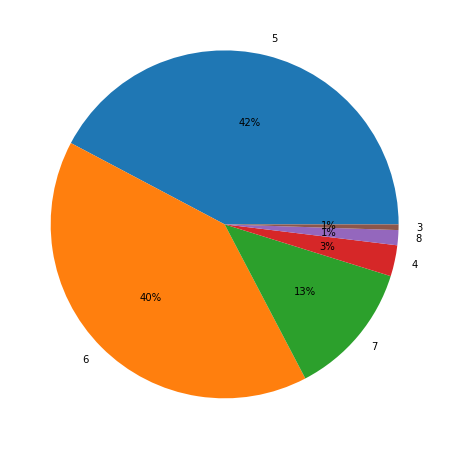

In [226]:
#WE SEE A BIG IMBALANCE IN THE TARGET VARIABLE

plt.figure(figsize=(8,8))
plt.pie(wine_df.quality.value_counts(normalize=True),autopct='%.0f%%',labels=wine_df.quality.unique())
plt.show()

In [184]:
#SCALING ALL OF THE DATA

from sklearn.preprocessing import StandardScaler

In [185]:
scaler = StandardScaler()

In [186]:
scaler.fit(wine_df.drop('quality',axis=1))

StandardScaler()

In [187]:
scaled_features = scaler.transform(wine_df.drop('quality',axis=1))

In [188]:
wine_feat = pd.DataFrame(scaled_features,columns=wine_df.columns[:-1])
wine_feat.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601


In [189]:
X = wine_feat
y = wine_df['quality']

In [190]:
#BALANCING THE DATA

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [191]:
oversample = SMOTE()

In [192]:
X_smote,y_smote = oversample.fit_resample(X,y)

In [193]:
X_smote.shape

(2898, 11)

In [194]:
#TRYING OUT THE MODELS ONCE AGAIN WITH THE BALANCED DATA

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.30, random_state=42)

In [196]:
#DECISION TREE

tree_smote = DecisionTreeClassifier()

In [197]:
tree_smote.fit(X_train,y_train)

DecisionTreeClassifier()

In [198]:
pred_tree_smote = tree_smote.predict(X_test)

In [199]:
print(classification_report(y_test,pred_tree_smote))
print('')
print(confusion_matrix(y_test,pred_tree_smote))
print('')
print('The accuracy score is: ',accuracy_score(y_test,pred_tree_smote))

              precision    recall  f1-score   support

           3       0.95      1.00      0.97       139
           4       0.83      0.87      0.85       145
           5       0.64      0.61      0.62       155
           6       0.56      0.49      0.52       153
           7       0.73      0.83      0.78       144
           8       0.92      0.87      0.90       134

    accuracy                           0.77       870
   macro avg       0.77      0.78      0.77       870
weighted avg       0.76      0.77      0.77       870


[[139   0   0   0   0   0]
 [  3 126   9   6   1   0]
 [  3  12  94  38   7   1]
 [  2  13  37  75  22   4]
 [  0   1   6  13 119   5]
 [  0   0   0   3  14 117]]

The accuracy score is:  0.7701149425287356


In [200]:
#RANDOM FOREST

rf_smote = RandomForestClassifier(n_estimators=1000)

In [201]:
rf_smote.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [202]:
pred_rf_smote = rf_smote.predict(X_test)

In [203]:
print(classification_report(y_test,pred_rf_smote))
print('')
print(confusion_matrix(y_test,pred_rf_smote))
print('')
print('The accuracy score is: ',accuracy_score(y_test,pred_rf_smote))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       139
           4       0.92      0.97      0.94       145
           5       0.78      0.72      0.75       155
           6       0.67      0.59      0.63       153
           7       0.82      0.90      0.86       144
           8       0.96      0.99      0.97       134

    accuracy                           0.86       870
   macro avg       0.85      0.86      0.86       870
weighted avg       0.85      0.86      0.85       870


[[139   0   0   0   0   0]
 [  0 141   3   1   0   0]
 [  2   3 111  34   5   0]
 [  1   9  28  90  23   2]
 [  0   1   0   9 130   4]
 [  0   0   0   0   1 133]]

The accuracy score is:  0.8551724137931035


In [204]:
#XGB

from xgboost import XGBClassifier 

In [205]:
XGB = XGBClassifier()

In [206]:
XGB.fit(X_train,y_train)

[23:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [207]:
pred_XGB = XGB.predict(X_test)

In [208]:
print(classification_report(y_test,pred_XGB))
print('')
print(confusion_matrix(y_test,pred_XGB))
print('')
print('The accuracy score is: ',accuracy_score(y_test,pred_XGB))

              precision    recall  f1-score   support

           3       0.99      0.99      0.99       139
           4       0.92      0.95      0.94       145
           5       0.75      0.68      0.71       155
           6       0.64      0.61      0.63       153
           7       0.82      0.89      0.85       144
           8       0.97      0.99      0.98       134

    accuracy                           0.85       870
   macro avg       0.85      0.85      0.85       870
weighted avg       0.84      0.85      0.84       870


[[138   0   1   0   0   0]
 [  0 138   2   4   1   0]
 [  1   9 105  35   5   0]
 [  1   3  32  94  21   2]
 [  0   0   0  14 128   2]
 [  0   0   0   0   1 133]]

The accuracy score is:  0.8459770114942529


In [209]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

In [210]:
#CHECKING FOR THE OPTIMAL N_NEIGHBORS

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

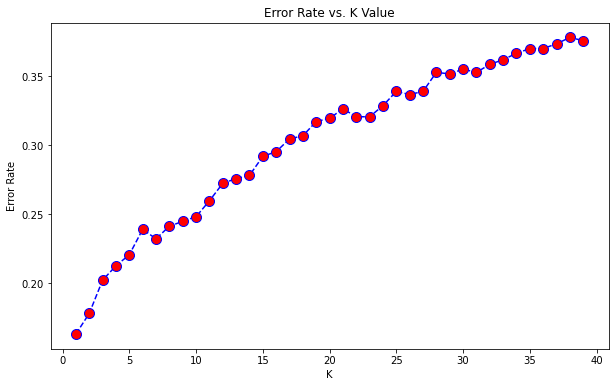

In [211]:
#PLOTTING THE ELBOW METHOD
#BUT I AM NOT SATISFIED WITH THE RESULT

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [212]:
KNN = KNeighborsClassifier(n_neighbors=1)

In [213]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [214]:
pred_KNN = KNN.predict(X_test)

In [215]:
print(classification_report(y_test,pred_KNN))
print('')
print(confusion_matrix(y_test,pred_KNN))
print('')
print('The accuracy score is: ',accuracy_score(y_test,pred_KNN))

              precision    recall  f1-score   support

           3       0.97      1.00      0.98       139
           4       0.89      0.99      0.94       145
           5       0.79      0.61      0.69       155
           6       0.64      0.54      0.58       153
           7       0.78      0.94      0.86       144
           8       0.94      0.99      0.96       134

    accuracy                           0.84       870
   macro avg       0.83      0.85      0.83       870
weighted avg       0.83      0.84      0.83       870


[[139   0   0   0   0   0]
 [  0 144   1   0   0   0]
 [  2   7  95  44   5   2]
 [  3   9  23  82  31   5]
 [  0   1   2   3 136   2]
 [  0   0   0   0   2 132]]

The accuracy score is:  0.8367816091954023
